In [1]:
# importing the required libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
# reading the excel file into dataframe and printing the head of the dataframe
df = pd.read_excel("ECA_data.xlsx")
df.head()


,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.00,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.05,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.85,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.30,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.25,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691


Q1 Listing the categorical and numeric variables

In [2]:
# finding the categorical variables from the columns list of the dataframe
categoricalVarList = []
for col in df.columns:
    ls = [x for x in set(df[col]) if str(x) != 'nan']
    if len(ls) <= 10:
        categoricalVarList.append(col)
# finding the numeric variables using set difference
numericVarList = list(set(df.columns) - set(categoricalVarList))

# printing the categorical and numberic variables
print("Categorical variables are:", categoricalVarList)
print("Numeric variables are:", numericVarList)

Categorical variables are: ['RATING', 'GENDER', 'EDUCATION', 'MARITAL', 'S1', 'S2', 'S3', 'S4', 'S5']
Numeric variables are: ['B4', 'R5', 'R3', 'R2', 'B1', 'INCOME', 'ID', 'B2', 'B5', 'R4', 'LIMIT', 'R1', 'B3', 'BALANCE', 'AGE']


Q2 Doing 4 preprocessing tasks

In [3]:
# replacing the nan values in the marital and eduction with 0 as there are some values
df['EDUCATION'] = df['EDUCATION'].fillna(0)
df['MARITAL'] = df['MARITAL'].fillna(0)

In [4]:
# removing the rows who have 0 balance because if the credit balance is zero then it won't affect the results of the model
df.drop(df.index[df['BALANCE'] <= 0], inplace=True)

In [5]:
# dropping the irrelevant columns for the credit facility
df.drop(['ID', 'AGE'], axis=1)
print(df.columns)

Index(['ID', 'LIMIT', 'BALANCE', 'INCOME', 'RATING', 'GENDER', 'EDUCATION',
       'MARITAL', 'AGE', 'S1', 'S2', 'S3', 'S4', 'S5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'R1', 'R2', 'R3', 'R4', 'R5'],
      dtype='object')


In [6]:
# creating a new column by creating mean from previous months billayble payments to new column
df["BNSUM"] = df[['B2', 'B3', 'B4', 'B5']].mean(axis=1)

Q3 Visualizing the insight for the relation between various variables

<AxesSubplot:xlabel='AGE', ylabel='INCOME'>

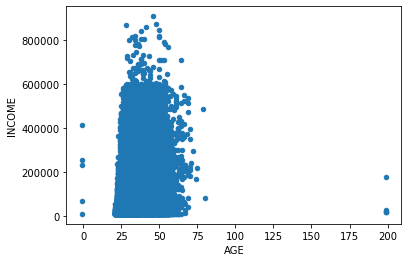

In [7]:
# plotting the relation between the age and income as the income is directly proportional to the age 
# and billing amount of the credit card is also directly proportional to the income 
df.plot.scatter(x="AGE", y="INCOME")

<AxesSubplot:xlabel='BALANCE', ylabel='B1'>

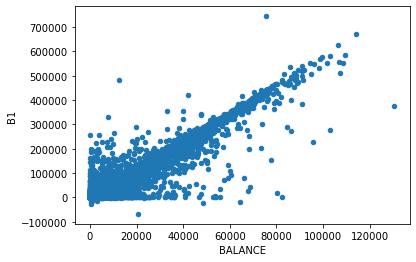

In [8]:
# plotting the relation between balance and billing amount as the user which have more balance
# corresponds to the credit expenses
df.plot.scatter(x="BALANCE",y="B1")

<AxesSubplot:xlabel='MARITAL', ylabel='B1'>

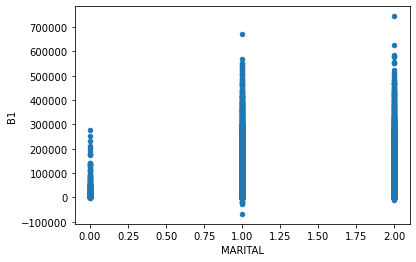

In [9]:
# plotting the relation between the marital status and billing amount 
# as the person with family tends to have more expenses than unmarried
df.plot.scatter(x="MARITAL",y="B1")

<AxesSubplot:xlabel='BNSUM', ylabel='B1'>

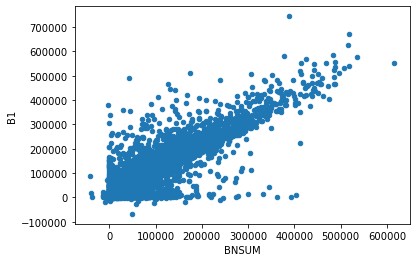

In [10]:
# plotting the relation between the average of the previous month's billing amount 
# and recent month's billing amount as the person who often spends more tends 
# to spend more recent month also
df.plot.scatter(x="BNSUM",y="B1")

Q4

Accuracy Score: 0.9246431250174172


<AxesSubplot:xlabel='B1'>

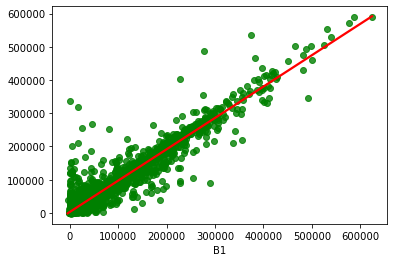

In [11]:
# In this method of regression there is preprocessing done by removing the irrelevant features from the data set for building the model

xTrain, xTest, yTrain, yTest = train_test_split(df[["AGE","MARITAL","BNSUM", "BALANCE"]], df["B1"], test_size=.3)
# creating the linear regression model
model = LinearRegression()
# fitting the model with the training data extracted from the dataset
model.fit(xTrain, yTrain)
# predicting the b1 values from the test data
yPred = model.predict(xTest)

# printing the accuracy of the model with test data
print("Accuracy Score:",model.score(xTest, yTest))
# plotting the best fit line with the scatter plot of the test data
sns.regplot(x=yTest,y=yPred,ci=None,scatter_kws={"color": "green"}, line_kws={"color": "red"})

Q5

In [12]:
# printing the intercept and coefficients and then the regression equation and also printing the key insights for the previous data prediction
interceptVal = model.intercept_
coeff =model.coef_ 
featuresNames = model.feature_names_in_
print("Coefficients Values:", coeff)
print("Features Name",featuresNames)
print("Intercept value:",interceptVal)

print("The final linear regression equation:",str(coeff[0])+"*"+featuresNames[0]+" + "+str(coeff[1])+"*"+featuresNames[1]+" + "+str(coeff[2])+"*"+featuresNames[2]+" + "+str(coeff[3])+"*"+featuresNames[3]+" + "+str(interceptVal))


Coefficients Values: [2.38077302e+01 7.33853027e+02 3.73162547e-01 3.71839814e+00]
Features Name ['AGE' 'MARITAL' 'BNSUM' 'BALANCE']
Intercept value: -2121.7784982223675
The final linear regression equation: 23.80773016948888*AGE + 733.8530273040864*MARITAL + 0.3731625471427253*BNSUM + 3.7183981445476926*BALANCE + -2121.7784982223675


The main key insights for the results obtained are the value of B1 is highly dependent on the Balance of the Customer and also the Customers billable amounts in the last 4 months along with its Age and Marital Status as unmarried person tends to show less billable amount from the insights above.